In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.3/723.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 3.2 MB/s eta 0:00:00


# 1. YOLOv8을 이용한 face detection
- https://huggingface.co/arnabdhar/YOLOv8-Face-Detection

In [ ]:
# load libraries
from huggingface_hub import hf_hub_download
from ultralytics import YOLO
from supervision import Detections
from PIL import Image

# download model
model_path = hf_hub_download(repo_id="arnabdhar/YOLOv8-Face-Detection", filename="model.pt")

# load model
model = YOLO(model_path)

# inference
image_path = "/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/yuri.jpg"
output = model(Image.open(image_path))
results = Detections.from_ultralytics(output[0])

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


model.pt:   0%|          | 0.00/6.25M [00:00<?, ?B/s]


0: 448x640 1 FACE, 102.9ms
Speed: 24.2ms preprocess, 102.9ms inference, 722.5ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
results

Detections(xyxy=array([[     818.38,      699.53,      1292.5,      1292.8]], dtype=float32), mask=None, confidence=array([    0.85291], dtype=float32), class_id=array([0]), tracker_id=None, data={'class_name': array(['FACE'], dtype='<U4')})

In [ ]:
results.xyxy[0]

array([     818.38,      699.53,      1292.5,      1292.8], dtype=float32)

In [ ]:
!pip install git+https://github.com/huggingface/diffusers.git

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-1c4o8jg1
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-1c4o8jg1
  Resolved https://github.com/huggingface/diffusers.git to commit c2e87869be81bef9c87adb34b7815adebe042e64
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.28.0.dev0-py3-none-any.whl size=2035131 sha256=6883928cc7645f6cd648c8ee885d6b6d82061423c74a494f31f07f3aed261ccd
  Stored in directory: /tmp/pip-ephem-wheel-cache-3eqsqw9g/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers


(594, 593)


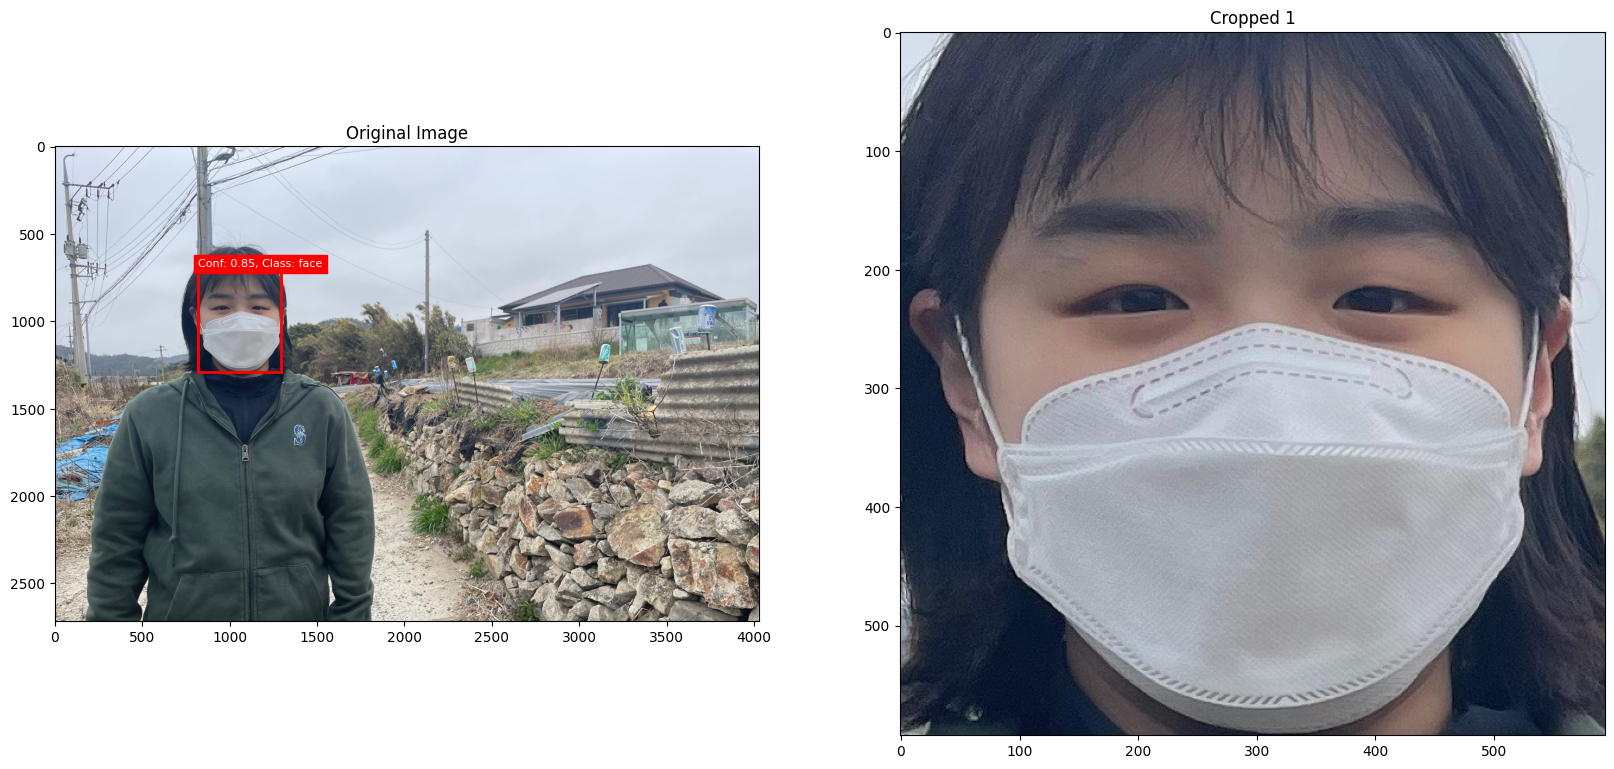

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# 이미지를 불러옵니다.
image = Image.open(image_path)

# 전체 그림을 위한 subplot 설정. 원본 이미지 + 각 바운딩 박스에 해당하는 이미지
fig, axs = plt.subplots(1, len(results.xyxy) + 1, figsize=(20, 12))

# 원본 이미지와 바운딩 박스 표시
axs[0].imshow(image)
axs[0].set_title("Original Image")

# 감지된 결과에서 각 객체에 대한 바운딩 박스를 그립니다.
for i in range(len(results.xyxy)):
    # 바운딩 박스 좌표를 추출합니다.
    x1, y1, x2, y2 = results.xyxy[i]
    # 신뢰도와 클래스 ID를 추출합니다.
    conf = results.confidence[i]
    cls = results.class_id[i]

    # 바운딩 박스를 그립니다.
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none')
    axs[0].add_patch(rect)

    # 신뢰도와 클래스 ID를 텍스트로 표시합니다.
    label = f'Conf: {conf:.2f}, Class: face'
    axs[0].text(x1, y1-10, label, color='white', backgroundcolor='red', fontsize=8, ha='left')

# 각 바운딩 박스에 대해
for i, bbox in enumerate(results.xyxy, start=1):
    x1, y1, x2, y2 = bbox
    width = x2 - x1
    height = y2 - y1

    # 정사각형 바운딩 박스로 만들기
    if width > height:
        center_y = y1 + height / 2
        y1 = center_y - width / 2
        y2 = center_y + width / 2
    else:
        center_x = x1 + width / 2
        x1 = center_x - height / 2
        x2 = center_x + height / 2

    # 이미지 크롭 & 정사각형 바운딩 박스에 해당하는 부분 표시
    cropped_image = image.crop((int(x1), int(y1), int(x2), int(y2)))
    print(cropped_image.size)
    # cropped_image.resize((512,512))
    cropped_image.save("/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/cropped_image512.jpg")
    axs[i].imshow(cropped_image)
    axs[i].set_title(f"Cropped {i}")

# ##################
# ## upscaling 4x ##
# from io import BytesIO
# from diffusers import LDMSuperResolutionPipeline
# import torch

# device = "cuda" if torch.cuda.is_available() else "cpu"
# model_id = "CompVis/ldm-super-resolution-4x-openimages"

# # load model and scheduler
# pipeline = LDMSuperResolutionPipeline.from_pretrained(model_id)
# pipeline = pipeline.to(device)

# img_path = "/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/cropped_image.jpg"
# low_res_image = Image.open(img_path).convert("RGB")

# # run pipeline in inference (sample random noise and denoise)
# upscaled_image = pipeline(low_res_image, num_inference_steps=300, eta=0.2).images[0]
# # save image
# upscaled_image.save("/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/upscaled_cropped_image.jpg")
# ## upscaling 4x ##
# ##################

# axs[2].imshow(upscaled_image)
# axs[2].set_title("upscaled(4x) image")

# # 축 정보 숨기기
# for ax in axs:
#     ax.axis('off')

# plt.tight_layout()
plt.show()



In [ ]:
####### image generation 이후 실행하세요 #############
from PIL import Image

image_path = "/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/yuri.jpg"
original_image = Image.open(image_path)
original_image = original_image.resize(128,128)
original_image.save("/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/final_128.jpg")

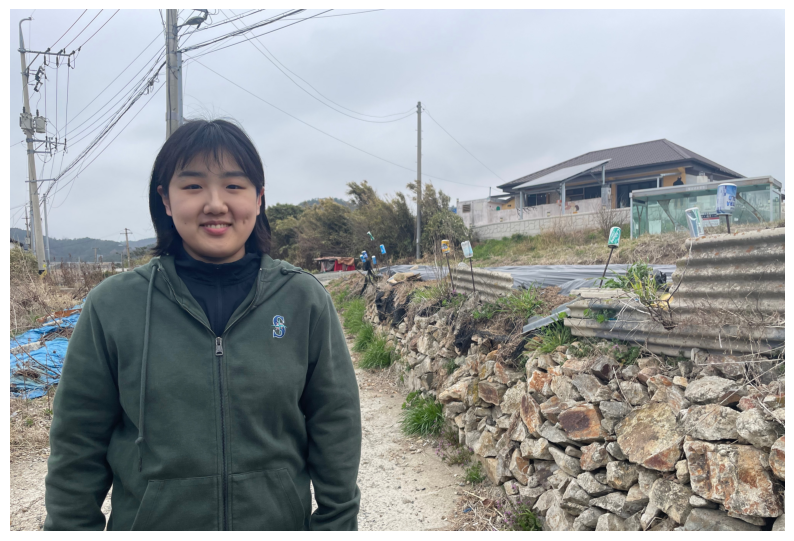

In [ ]:
####### image generation 이후 실행하세요 #############
from PIL import Image

image_path = "/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/yuri.jpg"
replacement_image_path = "/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/yuri_final4.png"

# 원본 이미지 불러오기
original_image = Image.open(image_path)
# 대체할 이미지 불러오기
replacement_image = Image.open(replacement_image_path)

width, height = x2 - x1, y2 - y1

# 대체할 이미지를 바운딩 박스의 크기에 맞게 조정
resized_replacement = replacement_image.resize((int(width), int(height)))

# 원본 이미지에 조정된 이미지 붙여넣기
original_image.paste(resized_replacement, (int(x1), int(y1)))

# 변경된 이미지 저장
original_image.save("/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/complete4.jpg")
# 변경된 이미지 플롯으로 띄우기
plt.figure(figsize=(10, 8))  # 플롯 크기 조정
plt.imshow(original_image)
plt.axis('off')  # 축 정보 숨기기
plt.show()


#여기서 런타임 초기화 하세용 (Segmentation)
- 안하면 메모리 터짐

In [ ]:
from PIL import Image
import requests
from transformers import SamModel, SamProcessor
import numpy as np
model = SamModel.from_pretrained("facebook/sam-vit-huge").to("cuda")
processor = SamProcessor.from_pretrained("facebook/sam-vit-huge")

# 로컬 파일 경로
img_path = "/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/cropped_image.jpg"

resize = 512
# requests.get 대신 Image.open을 사용하여 이미지 로드
raw_image = Image.open(img_path).convert("RGB")
raw_image = raw_image.resize((resize, resize))

# input_points 정의
input_points = [[[resize * (4 / 12), resize * (7 / 12)],  \
                [resize * (6 / 12), resize * (10 / 12)],  \
                [resize * (8 / 12), resize * (7 / 12)]]]

# input_boxes = [[[50,128],[450, 450]]]
inputs = processor(raw_image, input_points=input_points, return_tensors="pt").to("cuda")
# inputs = processor(raw_image, input_boxes=input_boxes, return_tensors="pt").to("cuda")
outputs = model(**inputs)
masks = processor.image_processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())
scores = outputs.iou_scores

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.56G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

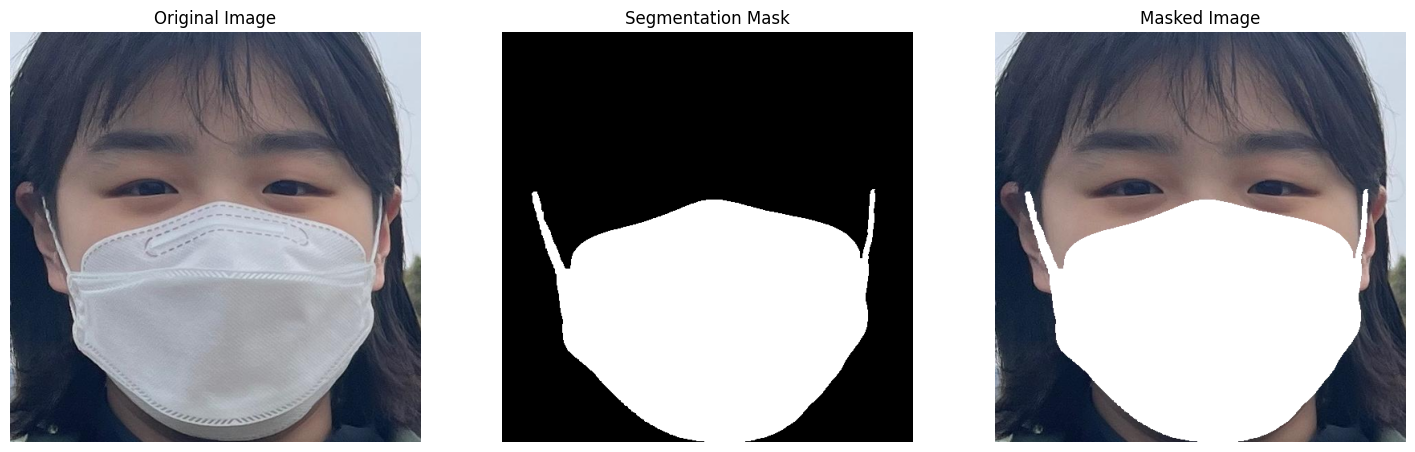

In [ ]:
import torch
import cv2
from torchvision.utils import save_image
save_folder = "/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/"
# bool을 float으로 변환 (True는 1.0, False는 0.0으로 변환됨)
mask = masks[0][0][0].float() # RGBA -> RGB -> binary
save_image(mask, save_folder+'yuri_mask_img2.png')

import numpy as np
import matplotlib.pyplot as plt

# PIL 이미지를 NumPy 배열로 변환
raw_image_np = np.array(raw_image)

# 원본 이미지에서 마스크에 해당하는 픽셀을 흰색으로 변경하기 위해
# NumPy 배열의 차원을 확인합니다.
if len(raw_image_np.shape) == 3 and raw_image_np.shape[2] == 3:  # RGB 이미지일 경우
    white_color = [255, 255, 255]  # RGB 흰색
else:  # 그레이스케일 이미지일 경우
    white_color = 255  # 단일 채널 흰색


#####################################

image_path = save_folder+'yuri_mask_img31.png'
binary_mask = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 이진 마스크를 확인하기 위해, 픽셀 값이 0과 255 사이인지 확인합니다.
# 필요한 경우 이진 마스크를 조정할 수 있습니다.
_, binary_mask = cv2.threshold(binary_mask, 127, 255, cv2.THRESH_BINARY)

# 커널(구조 요소)를 생성합니다. 여기서는 3픽셀의 확장을 위해 7x7 크기의 사각형 커널을 사용합니다.
kernel = np.ones((1, 1), np.uint8)

# dilate 함수를 사용해 경계를 확장합니다.
dilated_mask = cv2.dilate(binary_mask, kernel, iterations=1)
resized_img = Image.fromarray(dilated_mask)
resized_img.save(save_folder+"yuri_mask_img31.png")
#####################################

# 마스크를 NumPy 배열로 변환 (마스크가 이미 NumPy 배열인 경우 이 단계는 생략)
mask_np = dilated_mask

# 원본 NumPy 배열 이미지에서 마스크에 해당하는 픽셀을 흰색으로 변경
masked_image_np = raw_image_np.copy()
masked_image_np[mask_np == 255] = white_color

# 변경된 이미지를 다시 PIL 이미지로 변환하여 표시
masked_image = Image.fromarray(masked_image_np)

# 원본 이미지, 마스크, 그리고 변경된 이미지를 나란히 표시
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 원본 이미지 표시
axs[0].imshow(raw_image)
axs[0].set_title('Original Image')
axs[0].axis('off')

# 마스크 시각화
axs[1].imshow(mask_np, cmap='gray')
axs[1].set_title('Segmentation Mask')
axs[1].axis('off')

# 변경된 이미지 시각화
axs[2].imshow(masked_image)
axs[2].set_title('Masked Image')
axs[2].axis('off')

plt.show()


이미지를 생성하고 오세요

다음은 재삽입 코드입니다(위로)
